In [33]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression
import pytz
import datetime

In [43]:
df_source = pd.read_csv("Datasets/consommation-quotidienne-brute.csv", delimiter=";")

df_energie = df_source.drop(columns=[
    "Date","Heure",
    "Consommation brute gaz (MW PCS 0°C) - GRTgaz",
    "Statut - GRTgaz","Consommation brute gaz (MW PCS 0°C) - Teréga",
    "Statut - Teréga"
])

df_energie.columns = ["Date","Conso_gaz_totale_MW","Conso_elec_totale_MW","Statut","Conso_brute_totale_MW"]

# Constitution des formats de date
df_energie["FullDate"] = pd.to_datetime(df_energie["Date"], utc=True)
df_energie["FullDate"] = df_energie["FullDate"].dt.tz_convert('Europe/Paris') # On repasse donc en heure FR

df_energie["Date"]     = df_energie['FullDate'].dt.strftime('%Y-%m-%d')
df_energie["Heures"]   = df_energie['FullDate'].dt.strftime('%H:%M:%S')

df_energie.sort_values(by=["FullDate"], ascending=True, inplace=True) # Ordre chronologique
df_energie.reset_index(drop=True, inplace=True)

# Passage de la colonne date en index
df_energie.set_index('FullDate', inplace=True)

# Les mesures de ce Dataset sont arrêtées au 05/31/2022
df_energie = df_energie.loc[df_energie.index < "2022-05-31"]

df_energie["Conso_gaz_totale_MW"]   = df_energie["Conso_gaz_totale_MW"].interpolate(method='linear', axis=0)
df_energie["Conso_elec_totale_MW"]  = df_energie["Conso_elec_totale_MW"].interpolate(method='linear', axis=0)
df_energie["Conso_brute_totale_MW"] = df_energie["Conso_brute_totale_MW"].interpolate(method='linear', axis=0)

In [44]:
df_energie.head()

,Date,Conso_gaz_totale_MW,Conso_elec_totale_MW,Statut,Conso_brute_totale_MW,Heures
FullDate,,,,,,
2012-01-01 00:00:00+01:00,2012-01-01,55353.0,59610.0,Définitif,114963.0,00:00:00
2012-01-01 00:30:00+01:00,2012-01-01,55398.5,58314.0,Définitif,113318.5,00:30:00
2012-01-01 01:00:00+01:00,2012-01-01,55444.0,56230.0,Définitif,111674.0,01:00:00
2012-01-01 01:30:00+01:00,2012-01-01,55454.5,56075.0,Définitif,111335.0,01:30:00
2012-01-01 02:00:00+01:00,2012-01-01,55465.0,55531.0,Définitif,110996.0,02:00:00


In [45]:
# Vérification que plus aucune ligne n'est vide
df_energie.isna().sum()

Date                     0
Conso_gaz_totale_MW      0
Conso_elec_totale_MW     0
Statut                   0
Conso_brute_totale_MW    0
Heures                   0
dtype: int64

In [46]:
df_energie.columns

Index(['Date', 'Conso_gaz_totale_MW', 'Conso_elec_totale_MW', 'Statut',
       'Conso_brute_totale_MW', 'Heures'],
      dtype='object')

In [47]:
# Importing covid phases
covid_phases = [
    {
        "type": "span",
        'min': "2020-02-15",
        'max': "2020-03-17",
        'color': "blue",
        'label': "Premières restrictions",
    },
    {
        "type": "span",
        'min': "2020-03-17",
        'max': "2020-05-11",
        'color': "red",
        'label': "Confinement total 1",
    },
    {
        "type": "span",
        'min': "2020-10-30",
        'max': "2020-12-15",
        'color': "red",
        'label': "Confinement total 2",
    },
    {
        "type": "span",
        'min': "2021-01-16",
        'max': "2021-04-03",
        'color': "yellow",
        'label': "Couvre feu 1",
    },
    {
        "type": "span",
        'min': "2021-04-03",
        'max': "2021-05-19",
        'color': "red",
        'label': "Confinement total 3",
    },
    {
        "type": "line",
        'min': "2021-08-09",
        'max': "2021-08-09",
        'color': "yellow",
        'label': "Pass sanitaire",
    }
]

In [48]:
df_finish = df_energie.copy()

In [60]:
# Getting selected phase related rows by date
def get_rows_by_date_range(df, date_range):
    phase_1 = df.copy()
    phase_1 = phase_1.loc[((df_finish['Date'] >= date_range['min']) & (df_finish['Date'] <= date_range['max']))]
    return phase_1

date_range = covid_phases[1]
phase_1 = get_rows_by_date_range(df_finish, date_range)
phase_1

,Date,Conso_gaz_totale_MW,Conso_elec_totale_MW,Statut,Conso_brute_totale_MW,Heures
FullDate,,,,,,
2020-03-17 00:00:00+01:00,2020-03-17,51165.0,57244.0,Consolidé,108409.0,00:00:00
2020-03-17 00:30:00+01:00,2020-03-17,50903.0,55689.0,Consolidé,106118.5,00:30:00
2020-03-17 01:00:00+01:00,2020-03-17,50641.0,53187.0,Consolidé,103828.0,01:00:00
2020-03-17 01:30:00+01:00,2020-03-17,51205.0,52966.0,Consolidé,104060.5,01:30:00
2020-03-17 02:00:00+01:00,2020-03-17,51769.0,52524.0,Consolidé,104293.0,02:00:00
...,...,...,...,...,...,...
2020-05-11 21:30:00+02:00,2020-05-11,37472.0,44349.0,Consolidé,81515.0,21:30:00
2020-05-11 22:00:00+02:00,2020-05-11,36227.0,43673.0,Consolidé,79900.0,22:00:00
2020-05-11 22:30:00+02:00,2020-05-11,35585.0,44364.0,Consolidé,80894.0,22:30:00


In [61]:
def change_year_string(date_string, number_year_add):
    date_string_split = date_string.split('-')
    year_int = int(date_string_split[0]) + number_year_add
    date_string_split[0] = str(year_int)
    return "-".join(date_string_split)

In [62]:
# Getting selected phase related rows by date
def get_df_moved_year(move_year_by, base_df_date_range):
    phase_2_range = base_df_date_range.copy()
    phase_2_range['min'] = change_year_string(phase_2_range['min'] ,move_year_by)
    phase_2_range['max'] = change_year_string(phase_2_range['max'] ,move_year_by)

    phase_2 = df_finish.copy()
    phase_2 = phase_2.loc[((df_finish['Date'] >= phase_2_range['min']) & (df_finish['Date'] <= phase_2_range['max']))]
    return phase_2

phase_2 = get_df_moved_year(1, date_range)

In [63]:
phase_2

,Date,Conso_gaz_totale_MW,Conso_elec_totale_MW,Statut,Conso_brute_totale_MW,Heures
FullDate,,,,,,
2021-03-17 00:00:00+01:00,2021-03-17,60878.0,60454.0,Consolidé,121332.0,00:00:00
2021-03-17 00:30:00+01:00,2021-03-17,60764.0,59101.0,Consolidé,119465.0,00:30:00
2021-03-17 01:00:00+01:00,2021-03-17,60650.0,56948.0,Consolidé,117598.0,01:00:00
2021-03-17 01:30:00+01:00,2021-03-17,61136.5,56851.0,Consolidé,117949.5,01:30:00
2021-03-17 02:00:00+01:00,2021-03-17,61623.0,56678.0,Consolidé,118301.0,02:00:00
...,...,...,...,...,...,...
2021-05-11 21:30:00+02:00,2021-05-11,40174.5,47417.0,Consolidé,87295.0,21:30:00
2021-05-11 22:00:00+02:00,2021-05-11,38791.0,46895.0,Consolidé,85686.0,22:00:00
2021-05-11 22:30:00+02:00,2021-05-11,37654.0,47412.0,Consolidé,85787.0,22:30:00


In [64]:
# Compute evolution percentage between each values of 2 dataframes

def process_evolution_percentage(df1,df2):
    sub = df2.reset_index().select_dtypes('number').subtract(df1.reset_index().select_dtypes('number'), axis=0)
    div = sub.divide(df1.reset_index().select_dtypes('number'), axis=0)
    return div.loc[~div['Conso_gaz_totale_MW'].isnull()] *100

div = process_evolution_percentage(phase_1, phase_2)

In [65]:
# Formatting x-axis ticks labels
def generate_xticks_labels(df1, df2):
    phase_1_indexes = df1.index.strftime('%Y-%m-%d %H:%M:%S').tolist()
    phase_1_indexes = [s + " et " for s in phase_1_indexes]
    phase_2_indexes = df2.index.strftime('%Y-%m-%d %H:%M:%S').tolist()
    x_axis_labels = list(map(str.__add__, phase_1_indexes, phase_2_indexes))
    return x_axis_labels

x_axis_labels = generate_xticks_labels(phase_1, phase_2)
final_data = div.loc[~div['Conso_gaz_totale_MW'].isnull()]
final_data.index = x_axis_labels

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0.0, 0, '2020-03-17 00:00:00 et 2021-03-17 00:00:00'),
  Text(0.2, 0, ''),
  Text(0.4, 0, ''),
  Text(0.6000000000000001, 0, ''),
  Text(0.8, 0, ''),
  Text(1.0, 0, '2020-03-17 00:30:00 et 2021-03-17 00:30:00')])

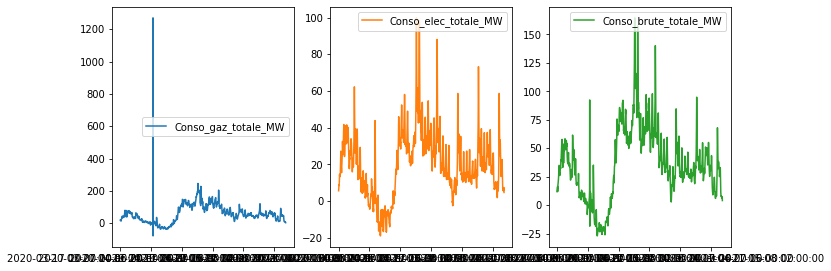

In [66]:
# Plotting
energies_2 = ["Conso_gaz_totale_MW","Conso_elec_totale_MW","Conso_brute_totale_MW"]
final_data.loc[:, energies_2].plot(subplots=True, figsize=(15, 15), layout=(3, 4))
plt.xticks(rotation = 90) 

In [67]:
final_data.describe()

,Conso_gaz_totale_MW,Conso_elec_totale_MW,Conso_brute_totale_MW
count,2688.000000,2688.000000,2688.000000
mean,58.320970,20.040333,35.896258
std,56.745996,17.426371,31.127655
min,-78.426145,-18.986041,-26.960862
25%,22.269416,9.172804,15.389953
50%,51.759229,19.297810,33.500176
75%,89.092722,30.959450,56.307553
max,1270.217984,99.822535,164.489532


In [68]:
final_data.mean()

Conso_gaz_totale_MW      58.320970
Conso_elec_totale_MW     20.040333
Conso_brute_totale_MW    35.896258
dtype: float64

Entre phase du covid "confinement 1" et l'année d'après (2021), augmentation conséquente de la consommation brute totale (environ +36%).

In [70]:
phase_3 = get_df_moved_year(-1, date_range)
phase_3

,Date,Conso_gaz_totale_MW,Conso_elec_totale_MW,Statut,Conso_brute_totale_MW,Heures
FullDate,,,,,,
2019-03-17 00:00:00+01:00,2019-03-17,48214.0,56381.0,Définitif,104595.0,00:00:00
2019-03-17 00:30:00+01:00,2019-03-17,48365.5,55148.0,Définitif,102965.5,00:30:00
2019-03-17 01:00:00+01:00,2019-03-17,48517.0,52819.0,Définitif,101336.0,01:00:00
2019-03-17 01:30:00+01:00,2019-03-17,48829.0,52181.0,Définitif,101022.5,01:30:00
2019-03-17 02:00:00+01:00,2019-03-17,49141.0,51568.0,Définitif,100709.0,02:00:00
...,...,...,...,...,...,...
2019-05-11 21:30:00+02:00,2019-05-11,38663.0,45794.0,Définitif,84264.5,21:30:00
2019-05-11 22:00:00+02:00,2019-05-11,37756.0,45872.0,Définitif,83628.0,22:00:00
2019-05-11 22:30:00+02:00,2019-05-11,36745.0,46859.0,Définitif,84512.0,22:30:00


(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0.0, 0, '2019-03-17 00:00:00 et 2021-03-17 00:00:00'),
  Text(0.2, 0, ''),
  Text(0.4, 0, ''),
  Text(0.6000000000000001, 0, ''),
  Text(0.8, 0, ''),
  Text(1.0, 0, '2019-03-17 00:30:00 et 2021-03-17 00:30:00')])

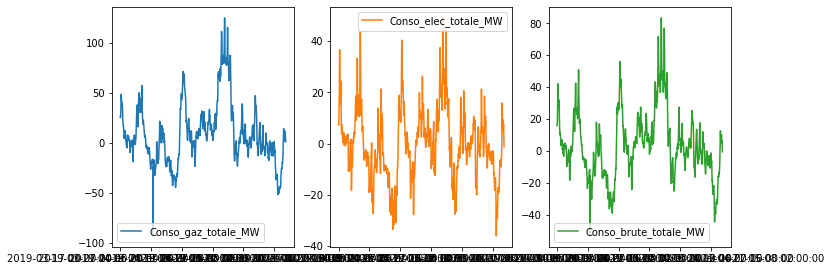

In [71]:
div2 = process_evolution_percentage(phase_3, phase_2)

x_axis_labels2 = generate_xticks_labels(phase_3, phase_2)
final_data2 = div2.loc[~div2['Conso_gaz_totale_MW'].isnull()]
final_data2.index = x_axis_labels2

final_data2.loc[:, energies_2].plot(subplots=True, figsize=(15, 15), layout=(3, 4))
plt.xticks(rotation = 90) 

In [73]:
final_data2.describe()

,Conso_gaz_totale_MW,Conso_elec_totale_MW,Conso_brute_totale_MW
count,2688.000000,2688.000000,2688.000000
mean,8.878083,-0.345533,3.691493
std,30.210417,13.157507,20.092289
min,-93.352298,-36.028816,-52.999203
25%,-9.586773,-8.510159,-8.660702
50%,3.936314,-0.777485,2.146837
75%,20.756104,7.548211,13.010816
max,124.805103,49.039396,83.394682


Entre phase du covid "confinement 1" et l'année d'avant (2019), augmentation minime de la consommation brute totale (environ +4%).